## NREL WIND Toolkit - Kita Demo

This notebook demonstrates basic usage of the National Renewable Energy Laboratory (NREL) Wind Integration National Dataset (WIND) Toolkit data. The file uses here is a subset (one month) of the WIND dataset.  To access the full seven years of data, see the instructions here: https://www.nrel.gov/grid/wind-toolkit.html. 


In [2]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Open the wind data "file"
f = h5pyd.File("/shared/NREL/windspeed_80m-2008-01.h5", 'r')  

In [22]:
f.attrs['history']   # attributes can be used to provide desriptions of the content

'Produced by 3TIER, Inc. under NREL subcontract AGV-2-22460-01'

In [5]:
list(f)  # list the datasets in the file

['datetime', 'windspeed_80m']

In [23]:
# get the windspeed at 80 meters
dset = f['windspeed_80m']

In [24]:
dset.id.id  # if this is an int, then you are using h5py!

'd-1d340184-bc09017e-cb1b-8a7d49-998345'

In [25]:
dset.shape  # shape is three-dimensional  time x lat x lon

(792, 1602, 2976)

In [26]:
dset.dtype  # type is four byte floats

dtype('float32')

In [27]:
dset.chunks  # chunks describe how the dataset data is stored

(26, 102, 186)

In [28]:
dset.shape[0] * dset.shape[1] * dset.shape[2] * 4  # 15 GB

15103604736

In [29]:
# read one slice of the data
%time data = dset[22,::,::]

CPU times: user 28 ms, sys: 36 ms, total: 64 ms
Wall time: 508 ms


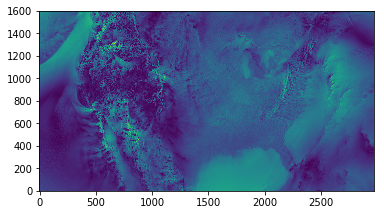

In [30]:
plt.imshow(data, origin="lower")

In [31]:
# Get all the values for a given geographic point
%time tseries = dset[:, 1292, 601]

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 53 ms


In [32]:
len(tseries)   # 365 days * 24 hours

792

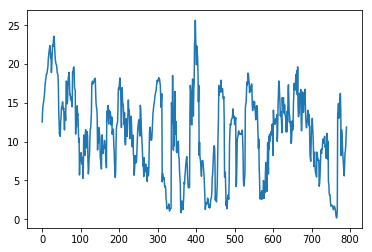

In [33]:
x = range(len(tseries))
plt.plot(x, tseries)

In [34]:
tseries.mean()

11.120181